In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [3]:
f'{train.shape}, {test.shape}'

'(58645, 13), (39098, 12)'

In [4]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
train[train['loan_status'] == 1]['person_home_ownership'].value_counts()

person_home_ownership
RENT        6809
MORTGAGE    1483
OWN           43
OTHER         15
Name: count, dtype: int64

In [6]:
train.isna().sum() # no hay nulos

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

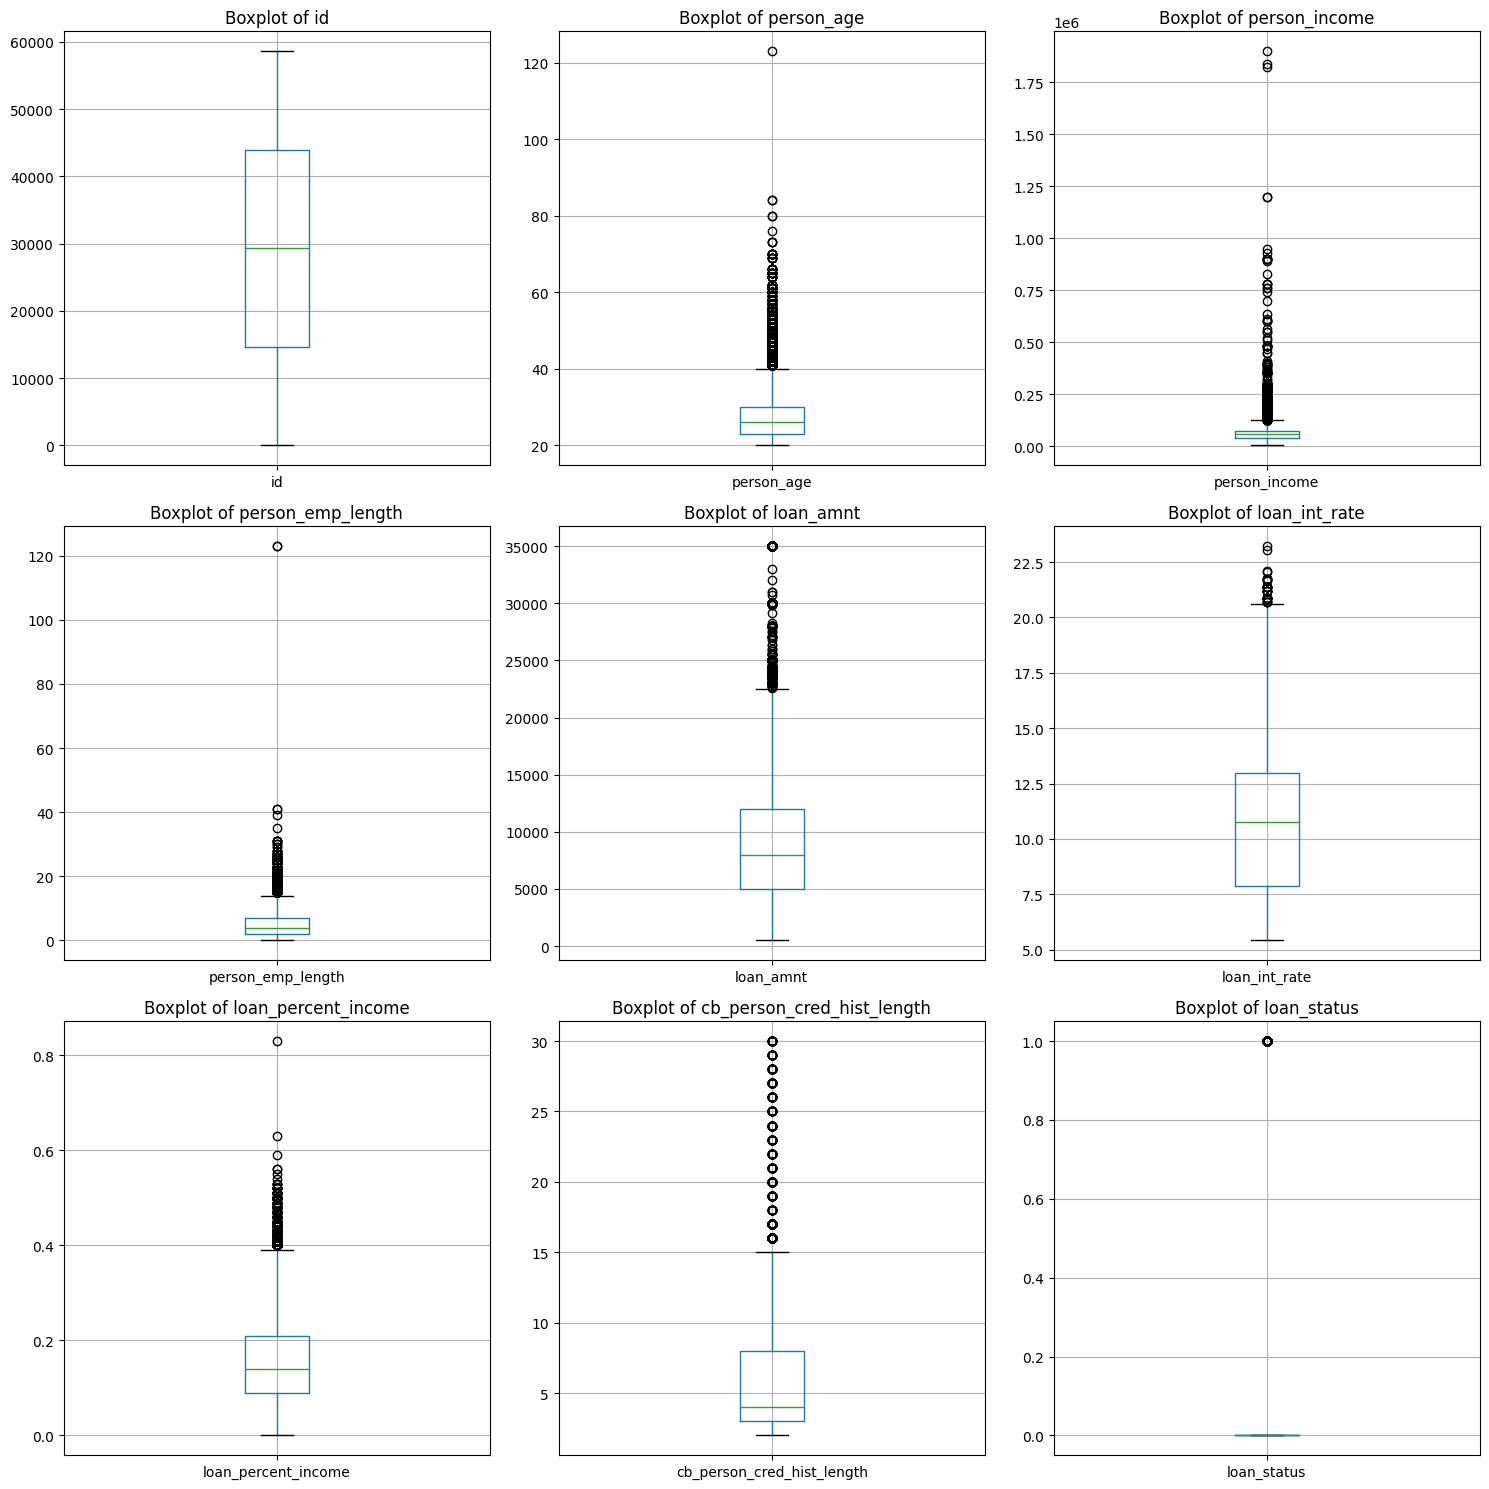

In [7]:
numerical_cols = train.select_dtypes(include=['number']).columns

# Configurar el tamaño de los subplots
num_plots = len(numerical_cols)
cols = 3  # Cantidad de subplots por fila
rows = (num_plots + cols - 1) // cols  # Calcular filas necesarias

# Crear subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Aplanar para facilitar la iteración

for i, col in enumerate(numerical_cols):
    train.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Ocultar subplots vacíos si hay más espacios que gráficos
for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
train[train['person_emp_length']> 100]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,0.35,Y,6,1
49252,49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,0.10,N,2,0


In [9]:
train[train['person_age']> 100]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,47336,123,36000,MORTGAGE,7.0,PERSONAL,B,6700,10.75,0.18,N,4,0


In [10]:
train['loan_status'].value_counts()/train['loan_status'].value_counts().sum()

loan_status
0    0.857618
1    0.142382
Name: count, dtype: float64